In [2]:
from __future__ import print_function
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

import cv2

# Forward model: specimen -> Intensity

## Specimen retardance, transmission, degree of polarization, slow axis

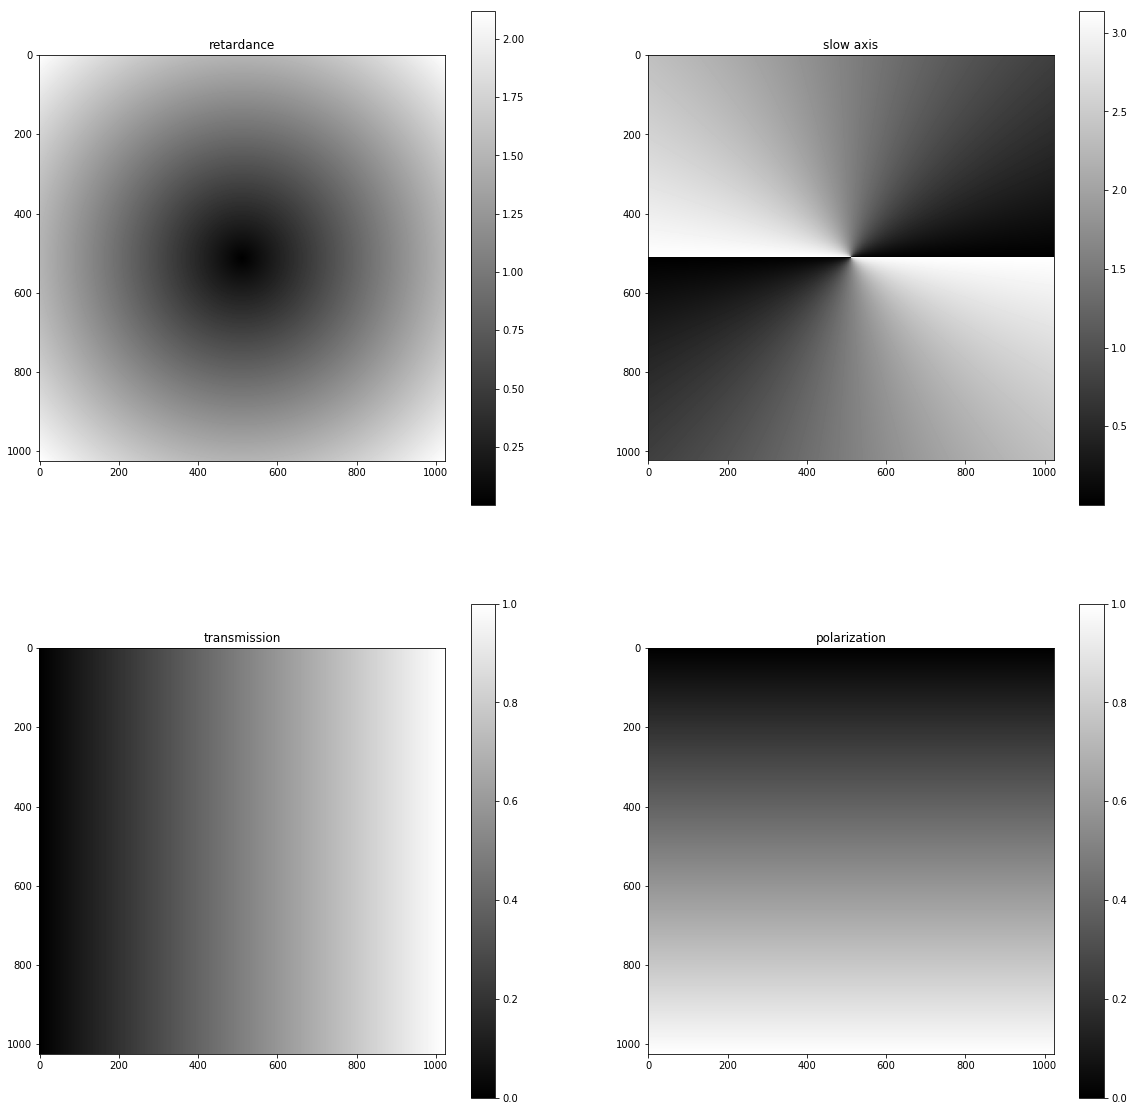

In [2]:
x = np.linspace(-1.5,1.5,1024)
x2 = np.linspace(0, 1, 1024)
xx, yy = np.meshgrid(x,x)
x2, y2 = np.meshgrid(x2,x2)
retardance = np.sqrt(xx**2+yy**2)
slowaxis = np.arctan2(yy,xx)%np.pi

transmission = x2
polarization = y2
                         

fig1 = plt.figure(figsize=(20,20)) # create a figure with the default size 

ax1 = fig1.add_subplot(2,2,1) 
im=plt.imshow(retardance,cmap='gray');
plt.title('retardance')
ax1.figure.colorbar(im);

ax2=fig1.add_subplot(2,2,2)
im=plt.imshow(slowaxis[-1:0:-1,], cmap='gray'); # Need to adapt this look up table to represent orientation.
plt.title('slow axis')
ax2.figure.colorbar(im);

ax3=fig1.add_subplot(2,2,3)
im=plt.imshow(transmission,cmap='gray');
plt.title('transmission')
ax3.figure.colorbar(im);

ax4=fig1.add_subplot(2,2,4)
im=plt.imshow(polarization,cmap='gray');
plt.title('polarization')
ax4.figure.colorbar(im);


In [ ]:

#write images as np files

np.save('./tests/testData/reconData/simulated/patterns_1/retardance', retardance)
np.save('./tests/testData/reconData/simulated/patterns_1/transmission', transmission)
np.save('./tests/testData/reconData/simulated/patterns_1/slowaxis', slowaxis)
np.save('./tests/testData/reconData/simulated/patterns_1/polarization', polarization)


In [6]:
def imBitConvert(im, bit=16, norm=False, limit=None):
    im = im.astype(np.float32, copy=False) 
    if norm:  # local or global normalization (for tiling)
        if not limit:  # if lmit is not provided, perform local normalization, otherwise global (for tiling)
            limit = [np.nanmin(im[:]), np.nanmax(im[:])]  # scale each image individually based on its min and max
        im = (im - limit[0]) / (limit[1] - limit[0]) * (2 ** bit - 1)
    else:  # only clipping, no scaling
        im = np.clip(im, 0, 2 ** bit - 1)  # clip the values to avoid wrap-around by np.astype
        
    if bit == 8:
        im = im.astype(np.uint8, copy=False)  # convert to 8 bit
    elif bit == 16:
        im = im.astype(np.uint16, copy=False)  # convert to 16 bit
    return im


cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/transmitted.png', imBitConvert(transmission*(10**3), bit=16, norm=True))
cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/retardance.png', imBitConvert(532*(retardance/(2*np.pi))*(10**3), bit=16) )
cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/polarization.png', imBitConvert((polarization)*(10**4), bit=16, norm=True) )
cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/slowaxis.png', imBitConvert(180*(slowaxis/np.pi)*(10**2), bit=16) )


True

In [7]:
s0=transmission
s1=transmission*polarization*np.sin(2*slowaxis)*np.sin(retardance)
s2=-transmission*polarization*np.cos(2*slowaxis)*np.sin(retardance)
s3=transmission*polarization*np.cos(retardance)

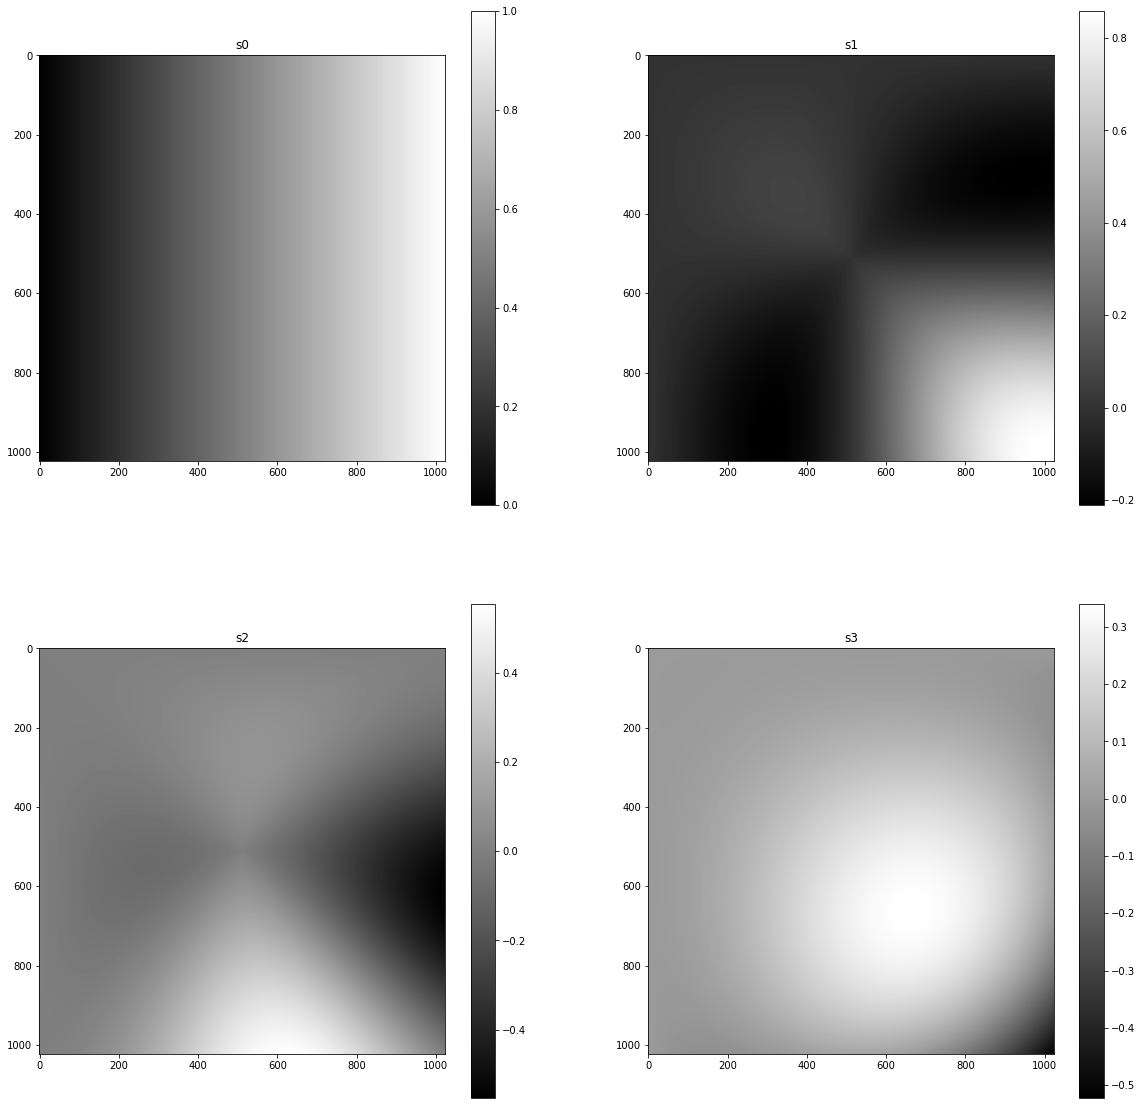

In [8]:
fig2 = plt.figure(figsize=(20,20)) # create a figure with the default size 

ax1 = fig2.add_subplot(2,2,1) 
im=plt.imshow(s0,cmap='gray');
plt.title('s0')
ax1.figure.colorbar(im);

ax2=fig2.add_subplot(2,2,2)
im=plt.imshow(s1,cmap='gray'); # Need to adapt this look up table to represent orientation.
plt.title('s1')
ax2.figure.colorbar(im);

ax3=fig2.add_subplot(2,2,3)
im=plt.imshow(s2,cmap='gray');
plt.title('s2')
ax3.figure.colorbar(im);

ax4=fig2.add_subplot(2,2,4)
im=plt.imshow(s3,cmap='gray');
plt.title('s3')
ax4.figure.colorbar(im);


In [10]:
cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/s0.png', s0)
cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/s1.png', s1)
cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/s2.png', s2)
cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/s3.png', s3)



True

## Intensity images

In [9]:
height,width=s0.shape
s=np.zeros((4,height,width))
s[0,:,:]=s0;  s[1,:,:]=s1; s[2,:,:]=s2; s[3,:,:]=s3;
Svec=s.reshape(4,height*width);

In [10]:
chi=2*np.pi*0.25
StoIMatLC=np.array([ [1, 0, 0, -1],
                     [1, np.sin(chi), 0, -np.cos(chi)],
                     [1, 0, np.sin(chi), -np.cos(chi)],
                     [1, -np.sin(chi), 0, -np.cos(chi)],
                     [1, 0, -np.sin(chi), -np.cos(chi)]])
Ivec=np.dot(StoIMatLC,Svec)
I=Ivec.reshape(5,height,width)
Iext=I[0,:,:]; I0=I[1,:,:]; I45=I[2,:,:]; I90=I[3,:,:]; I135=I[4,:,:];


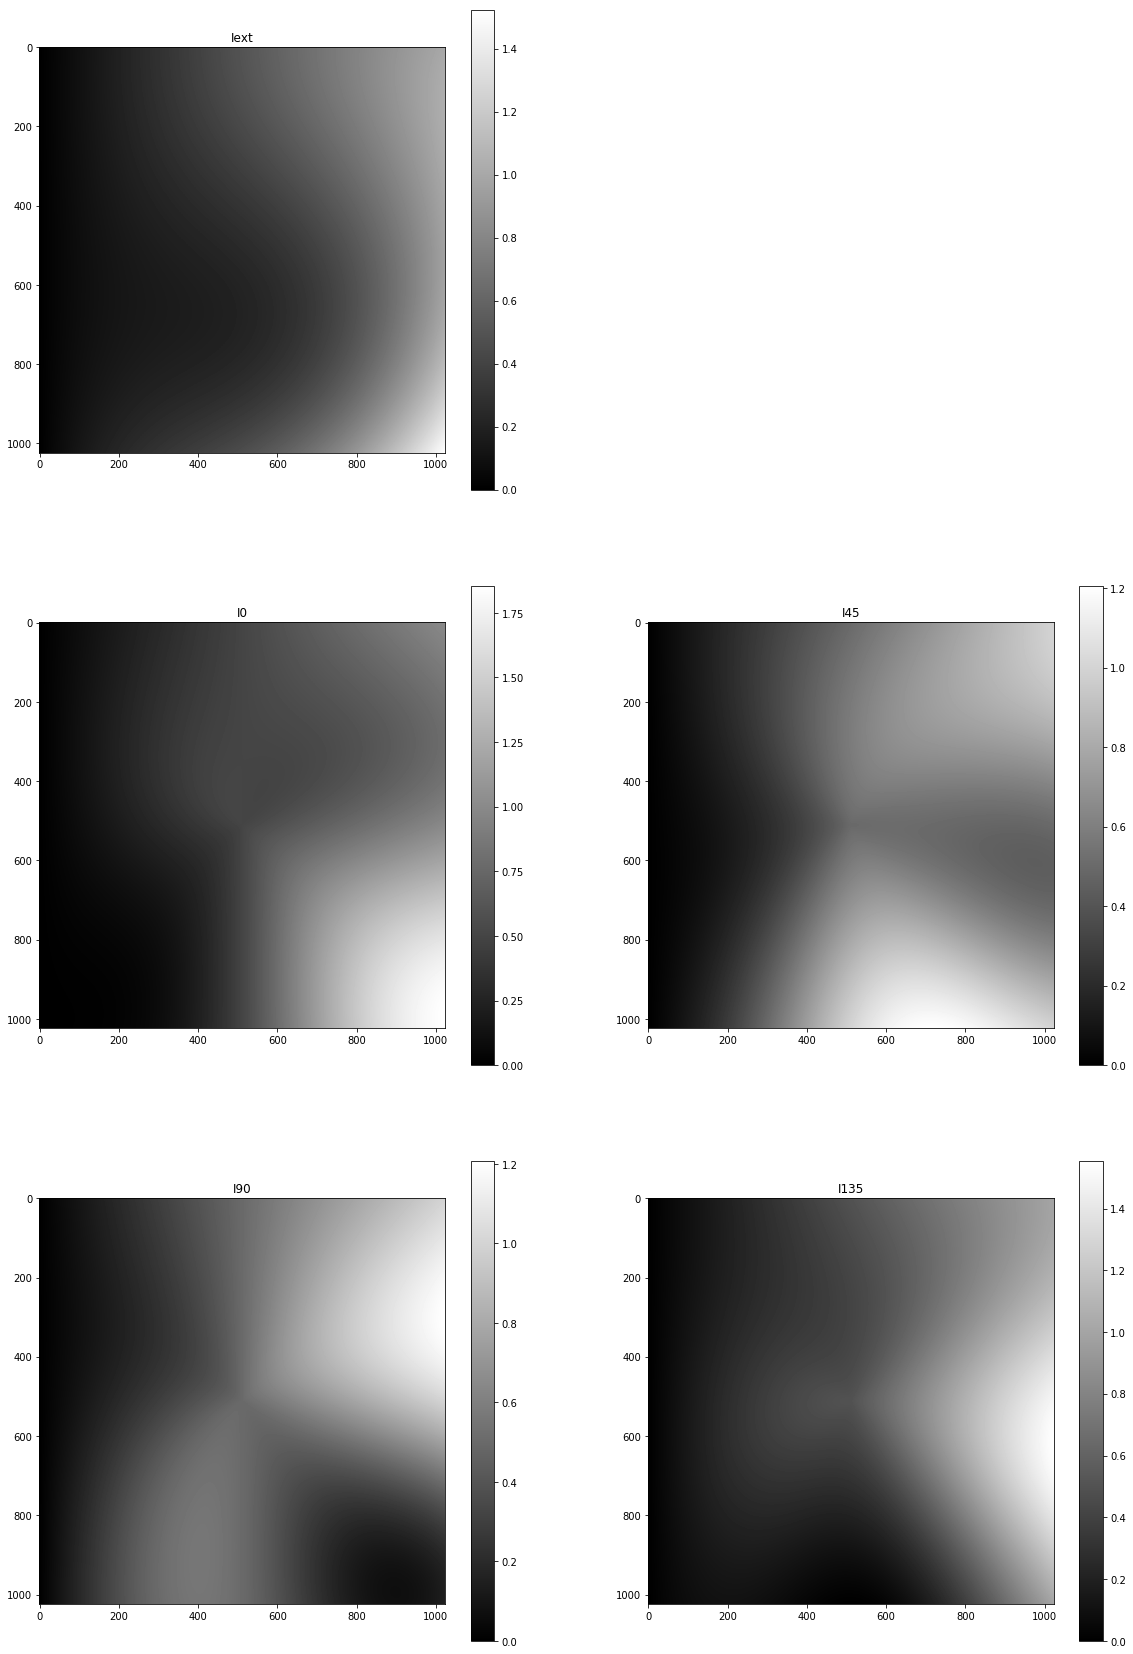

In [11]:
fig3 = plt.figure(figsize=(20,30)) # create a figure with the default size

ax1 = fig3.add_subplot(3,2,1) 
im=plt.imshow(Iext,cmap='gray');
plt.title('Iext')
ax1.figure.colorbar(im);

ax2=fig3.add_subplot(3,2,3)
im=plt.imshow(I0,cmap='gray'); # Need to adapt this look up table to represent orientation.
plt.title('I0')
ax2.figure.colorbar(im);

ax3=fig3.add_subplot(3,2,4)
im=plt.imshow(I45,cmap='gray');
plt.title('I45')
ax3.figure.colorbar(im);

ax4=fig3.add_subplot(3,2,5)
im=plt.imshow(I90,cmap='gray');
plt.title('I90')
ax4.figure.colorbar(im);

ax5=fig3.add_subplot(3,2,6)
im=plt.imshow(I135,cmap='gray');
plt.title('I135')
ax4.figure.colorbar(im);


In [59]:
# write images as np files

np.save('./tests/testData/reconData/simulated/patterns_1/Iext', Iext)
np.save('./tests/testData/reconData/simulated/patterns_1/I0', I0)
np.save('./tests/testData/reconData/simulated/patterns_1/I45', I45)
np.save('./tests/testData/reconData/simulated/patterns_1/I90', I90)
np.save('./tests/testData/reconData/simulated/patterns_1/I135', I135)

In [13]:
def scale_to_images(x):
    '''
    assumes x is one of intensity images of type: Iext, I0, I45, I90, I135
        each being calculated from the specimen (not measured)
        each has a range of 0 to pi/2
    :param x: np.ndarray
    :return: images scaled to 16-bit
    '''
    
    return (2*x/np.pi*65536).astype(np.uint16)


Iexts = scale_to_images(Iext)
I0s = scale_to_images(I0)
I45s = scale_to_images(I45)
I90s = scale_to_images(I90)
I135s = scale_to_images(I135)

# Iext = imBitConvert(Iext, bit=16, norm=True)
# I0 = imBitConvert(I0, bit=16, norm=True)
# I45 = imBitConvert(I45, bit=16, norm=True)
# I90 = imBitConvert(I90, bit=16, norm=True)
# I135 = imBitConvert(I135, bit=16, norm=True)


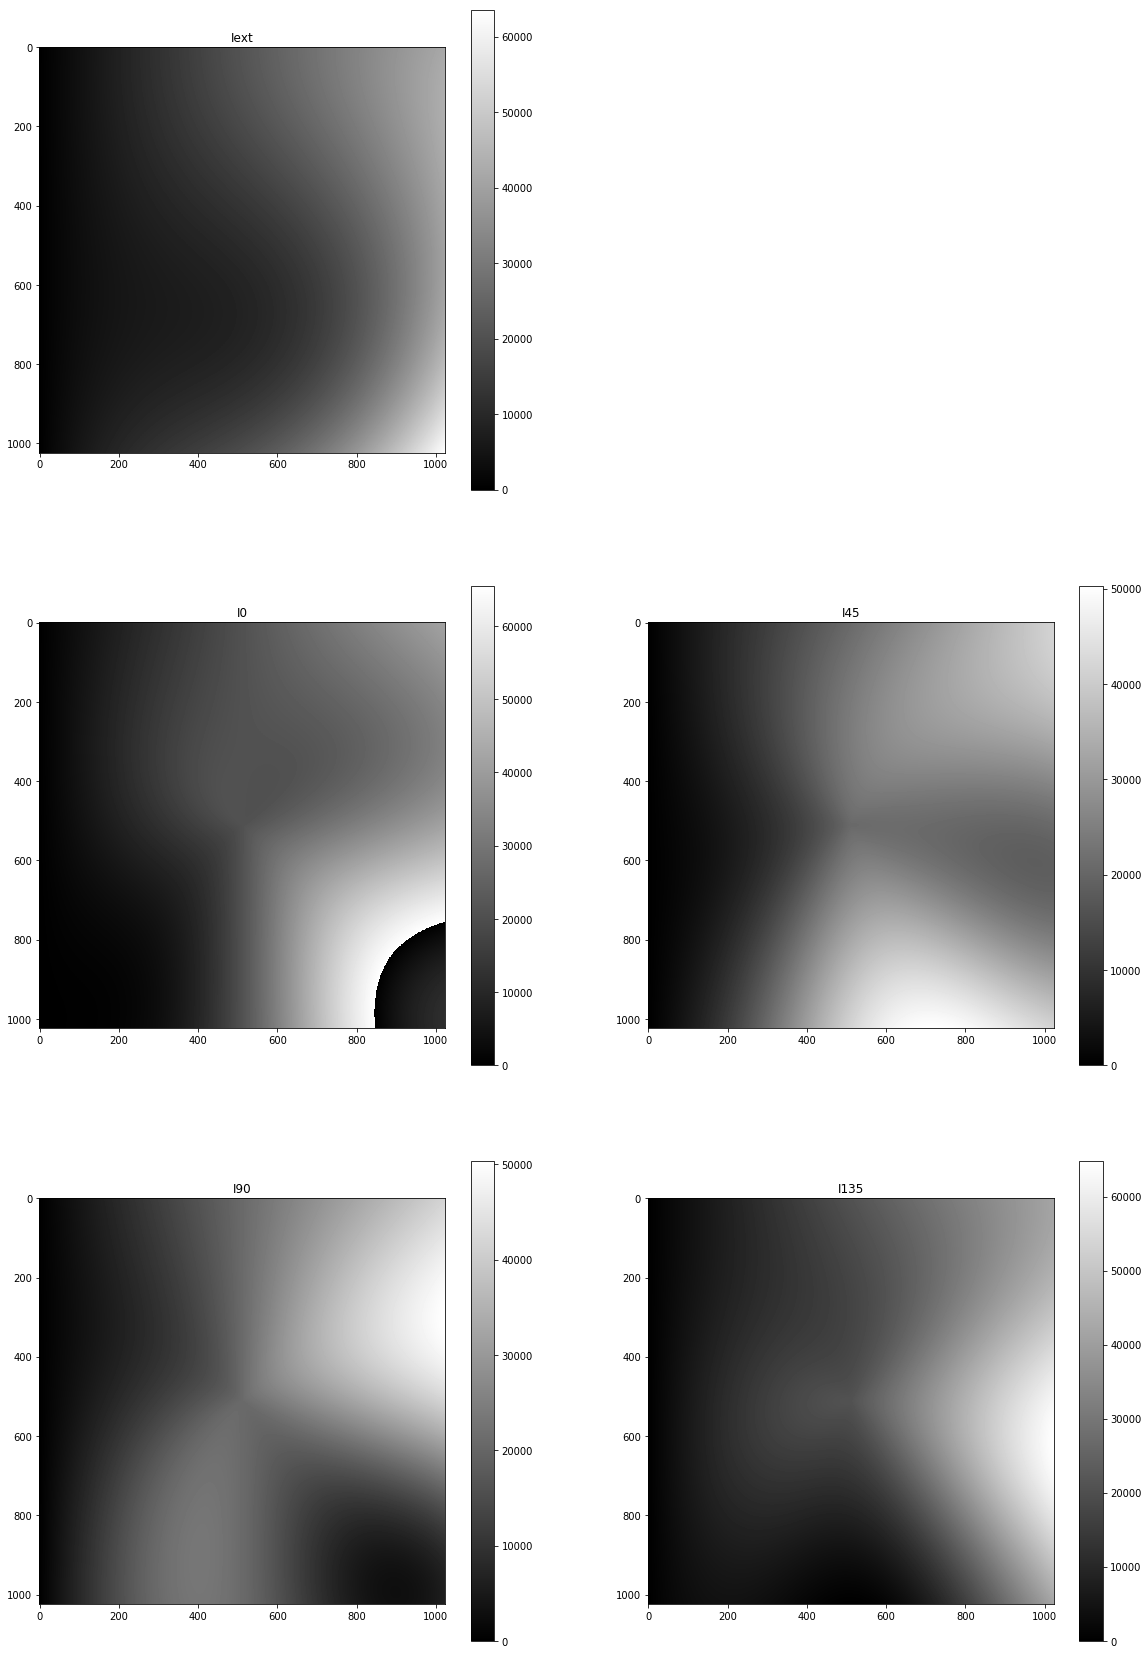

In [14]:
fig3 = plt.figure(figsize=(20,30)) # create a figure with the default size

ax1 = fig3.add_subplot(3,2,1) 
im=plt.imshow(Iexts, cmap='gray');
plt.title('Iext')
ax1.figure.colorbar(im);

ax2=fig3.add_subplot(3,2,3)
im=plt.imshow(I0s, cmap='gray'); # Need to adapt this look up table to represent orientation.
plt.title('I0')
ax2.figure.colorbar(im);

ax3=fig3.add_subplot(3,2,4)
im=plt.imshow(I45s, cmap='gray');
plt.title('I45')
ax3.figure.colorbar(im);

ax4=fig3.add_subplot(3,2,5)
im=plt.imshow(I90s, cmap='gray');
plt.title('I90')
ax4.figure.colorbar(im);

ax5=fig3.add_subplot(3,2,6)
im=plt.imshow(I135s, cmap='gray');
plt.title('I135')
ax4.figure.colorbar(im);


In [30]:
cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/Iext.png', Iext)
cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/I0.png', I0)
cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/I45.png', I45)
cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/I90.png', I90)
cv2.imwrite('./tests/testData/reconData/simulated/patterns_1/I135.png', I135)


True

True

True

True

True

In [16]:
np.isnan(Iexts).any()
np.isnan(I0s).any()
np.isnan(I45s).any()
np.isnan(I90s).any()
np.isnan(I135s).any()

False

False

False

False

False

In [18]:
np.nanmax(Iexts)
np.nanmax(I0s)
np.nanmax(I45s)
np.nanmax(I90s)
np.nanmax(I135s)

63547

65535

50335

50350

64813